In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Uni_linear.txt",header=None,names=['x','y'])
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Prediction')

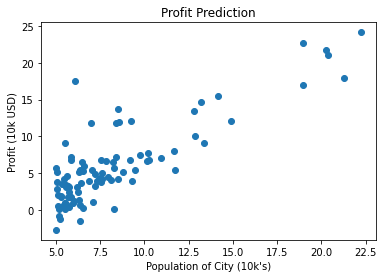

In [4]:
plt.scatter(df.x,df.y)
plt.xlabel("Population of City (10k's)")
plt.ylabel("Profit (10k USD)")
plt.title("Profit Prediction")

### Compute the Cost Function $J(\Theta)$  through normal equation

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$

In [139]:
def ComputeCost(X,y,theta):
    m=len(y)
    pred=X.dot(theta)
    square_err=(pred-y)**2
    return (1/(2*m))*(np.sum(square_err))

In [6]:
data_n=df.values

In [7]:
m=data_n.shape[0]
y=data_n[:,1].reshape(m,1)
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
theta=np.zeros((2,1))

In [8]:
CoumputeCost(X,y,theta)

32.072733877455676

# with Gradient decent
minimize the cost function $ J(\Theta) $
we willl update the gradient decent equation by keep assiging the value of $ J(\Theta) $

 $\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) -y^{(i)})x_j^{(i)}$

In [9]:
def GradientDecent(X,y,theta,alpha,iterations):
    m=len(y) #calculating no of values
    cost=[]
    for i in range(iterations):
            predict=np.dot(X,theta)
            diff=np.dot(X.transpose(),(predict-y))
            decent=alpha *1/m * diff
            theta=theta - decent
            cost.append(CoumputeCost(X,y,theta))
    return cost,theta

In [10]:
cost,theta=GradientDecent(X,y,theta,0.01,1500)
print("The equation for the fitted line would be \n y={b}x+{a}".format(a=str(round(theta[0,0],2)),b=str(round(theta[1,0],2))))
theta

The equation for the fitted line would be 
 y=1.17x+-3.63


array([[-3.63029144],
       [ 1.16636235]])

### predict1 = [1, 3.5] * theta;

In [11]:
def predictY(X,theta):
    prediction=np.dot(theta.transpose(),X)
    return prediction[0]

In [12]:
pred=predictY(np.array([1,3.5]),theta)*10000

In [30]:
print("Prediction against x=3.5 should be $",round(predictY(np.array([1,3.5]),theta)*10000,2))

Prediction against x=3.5 should be $ 4519.77


In [29]:
print("Prediction against x=7 should be $",round(predictY(np.array([1,7]),theta)*10000,2))

Prediction against x=7 should be $ 45342.45


### Visualising the Cost Function $J(\Theta)$

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
#Generating values for theta0, theta1 and the resulting cost value
theta0=np.linspace(-20,20,100)
theta1=np.linspace(-1,4,100)
J_theta_values=np.zeros((len(theta0),len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        theta_values=np.array([theta0[i],theta1[j]])
        J_theta_values[i,j]=CoumputeCost(X,y,theta_values)
        

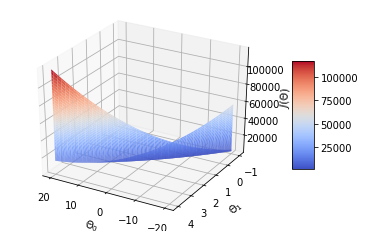

In [17]:
#Generating the Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0, theta1,J_theta_values, cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,120)

## plotting cost and $\Theta$

Text(0.5, 1.0, 'Cost function using Gradient Descent')

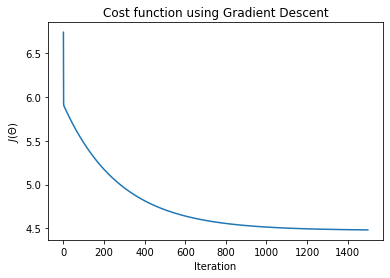

In [60]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Graph with Line of Best Fit

Text(0.5, 1.0, 'Profit Prediction')

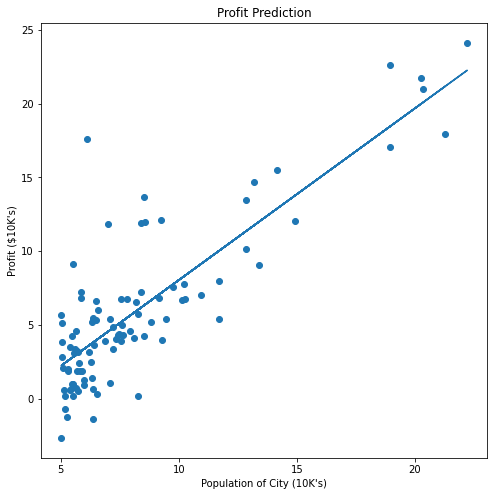

In [61]:
plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.plot(df['x'],theta[0]+df['x']*theta[1])
plt.xlabel("Population of City (10K's)")
plt.ylabel("Profit ($10K's)")
plt.title("Profit Prediction")

In [24]:
theta

array([[-3.63029144],
       [ 1.16636235]])

#### Predicting the result with optimized values of  $\Theta$

predict1 = [1, 3.5] * theta;

predict2 = [1, 7] * theta;

In [27]:
def prediction_with_newTheta(X,Theta):
    pred= np.dot(Theta.transpose(),X)
    return pred[0]

In [35]:
predict1=prediction_with_newTheta(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [36]:
predict1=prediction_with_newTheta(np.array([1,7]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $45342.0


## Liner Regression with multiple variables

In [40]:
multi=pd.read_csv("Multi_linear.txt",header=None)

In [42]:
multi.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [47]:
multi.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [54]:
# x1=multi[0].values
# x2=multi[1].values
# y=multi[2].values

Text(0.5, 1.0, 'House prices against no of bedroom')

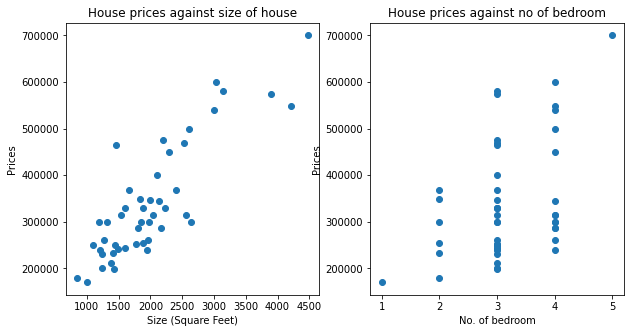

In [63]:
## To uderstand the behavior of both of variable with y we can create the subplots to check the same
fig,axes=plt.subplots(figsize=(10,5),nrows=1,ncols=2)
axes[0].scatter(multi[0],multi[2])
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(multi[1],multi[2])
axes[1].set_xlabel("No. of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_title("House prices against no of bedroom")

### Feature Normalization

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [172]:
def NormalizeFeature(X):
    mean=np.mean(X,axis=0)
    sd=np.std(X,axis=0)
    X_normalised=(X-mean)/sd
    return X_normalised,mean,std

In [173]:
data_n2=multi.values
m2=len(data_n2[:,-1])
y2=data_n2[:,2].reshape(m2,1)
X2=data_n2[:,0:2].reshape(m2,2)
X2,mean,std= NormalizeFeature(X2)
X2=np.append(np.ones((m2,1)),X2,axis=1)
theta2=np.zeros((3,1))

### Compute Cost $J(\Theta)$

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$

In [174]:
ComputeCost(X2,y2,theta2)

65591548106.45744

## Gradient Descent

Minimize the cost function $J(\Theta)$ 

By updating Equation and repeat unitil convergence
        
$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [175]:
def GradientDecent(X,y,theta,alpha,iteration):
    m=len(y)
    cost=[]
    for i in range(iteration):
        prediction=np.dot(X,theta)
        error=np.dot(X.transpose(),(prediction-y))
        descent=alpha*1/m*error
        theta -= descent
        cost.append(ComputeCost(X,y,theta))
    return theta,cost
    #I am again creating it for  practice again**

### using gradient decent for computing theta and cost

In [176]:
theta2,cost=GradientDecent(X2,y2,theta2,0.1,500)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


## Visualizing cost function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

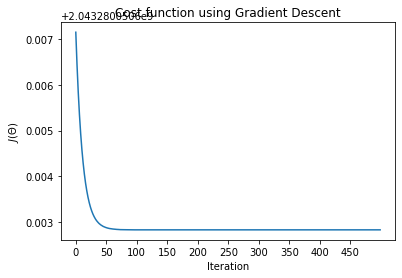

In [161]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.xticks(np.arange(0,500,step=50))
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent",)

### Make predictions using the optimized $\Theta$ values

In [188]:
X2_sample=NormalizeFeature(np.array([1650,3]))[0]
X2_sample=np.append(np.ones(1),X2_sample)
predict_price=prediction_with_newTheta(X2_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict_price,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
